# **Preparation**

In [2]:
import pandas as pd

Import CSV Dataset


In [3]:
df = pd.read_csv('spam_assassin.csv')
print(df.head(10))

                                                text  target
0  From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...       0
1  From gort44@excite.com Mon Jun 24 17:54:21 200...       1
2  From fork-admin@xent.com Mon Jul 29 11:39:57 2...       1
3  From dcm123@btamail.net.cn Mon Jun 24 17:49:23...       1
4  From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...       0
5  From tobaccodemon@terra.es Sat Sep 7 22:05:58 ...       1
6  From larlar78@MailOps.Com Sat Jun 30 00:19:08 ...       1
7  From rpm-list-admin@freshrpms.net Thu Jul 25 1...       0
8  From exmh-users-admin@redhat.com Wed Aug 7 06:...       0
9  From contractor@goldenbay.com.cy Tue Jul 23 23...       1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


Check Null DataFrame values

In [5]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [6]:
df['target']

0       0
1       1
2       1
3       1
4       0
       ..
5791    0
5792    0
5793    1
5794    0
5795    0
Name: target, Length: 5796, dtype: int64

Vectorizer

In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

X.shape

(5796, 132561)

Train & Test Data Split

In [8]:
from sklearn.model_selection import train_test_split

# X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4636, 132561)
(1160, 132561)
(4636,)
(1160,)


# SVM Model

In [9]:
import numpy as np
from sklearn.svm import SVC

clf = SVC(kernel='linear', verbose=True)
clf.fit(X_train, y_train)

[LibSVM]

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,True


In [10]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      1.00      1.00       779
           1       1.00      0.98      0.99       381

    accuracy                           0.99      1160
   macro avg       1.00      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



# Implement PCA 2D Projection

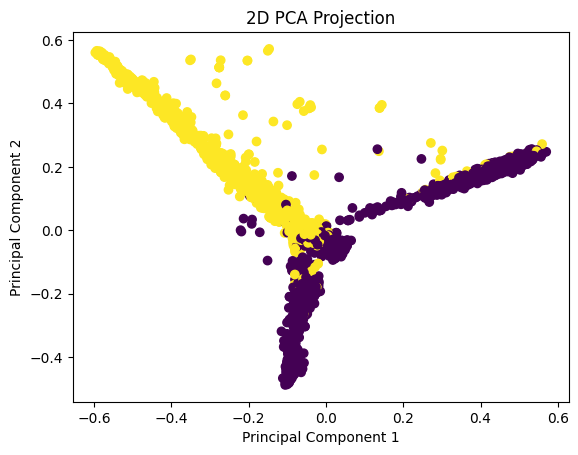

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()

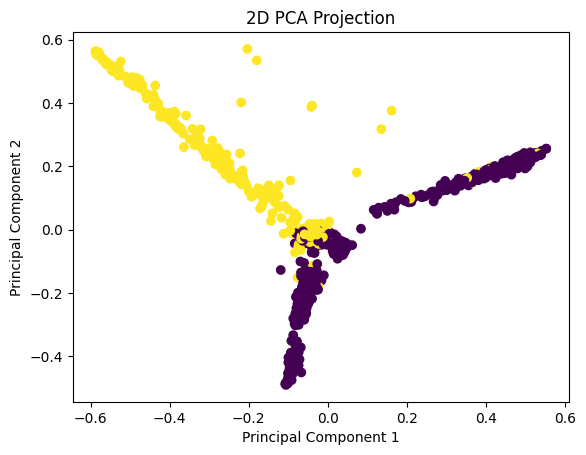

In [12]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()

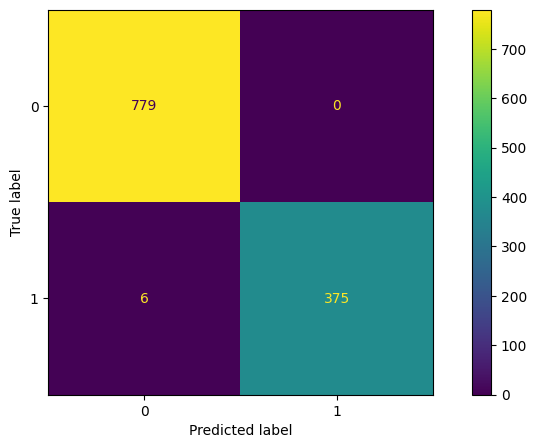

In [13]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_RF = RandomForestClassifier(n_estimators=100, random_state=42)
clf_RF.fit(X_train, y_train)

y_pred_RF = clf_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Random Forest Accuracy:", accuracy_RF)

# 0.9948275862068966

Random Forest Accuracy: 0.9913793103448276


Random Forest Accuracy: 0.9913793103448276
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       779
           1       0.99      0.98      0.99       381

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



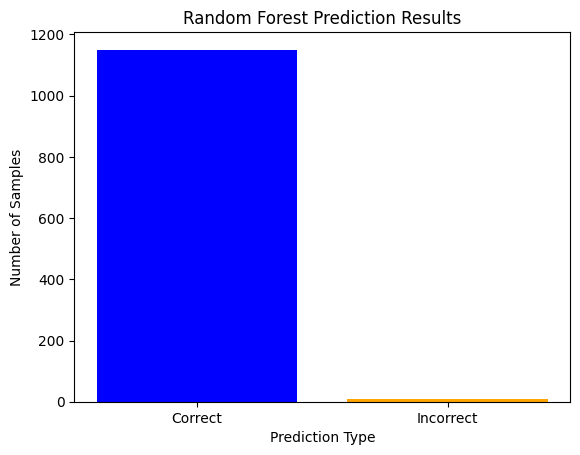

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest
clf_RF = RandomForestClassifier(n_estimators=100, random_state=42)
clf_RF.fit(X_train, y_train)

# Predict and evaluate
y_pred_RF = clf_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Random Forest Accuracy:", accuracy_RF)
print(classification_report(y_test, y_pred_RF))

# Plotting correct vs incorrect predictions
labels = ['Correct', 'Incorrect']
counts = [np.sum(y_pred_RF == y_test), np.sum(y_pred_RF != y_test)]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Random Forest Prediction Results')
plt.xlabel('Prediction Type')
plt.ylabel('Number of Samples')
plt.show()


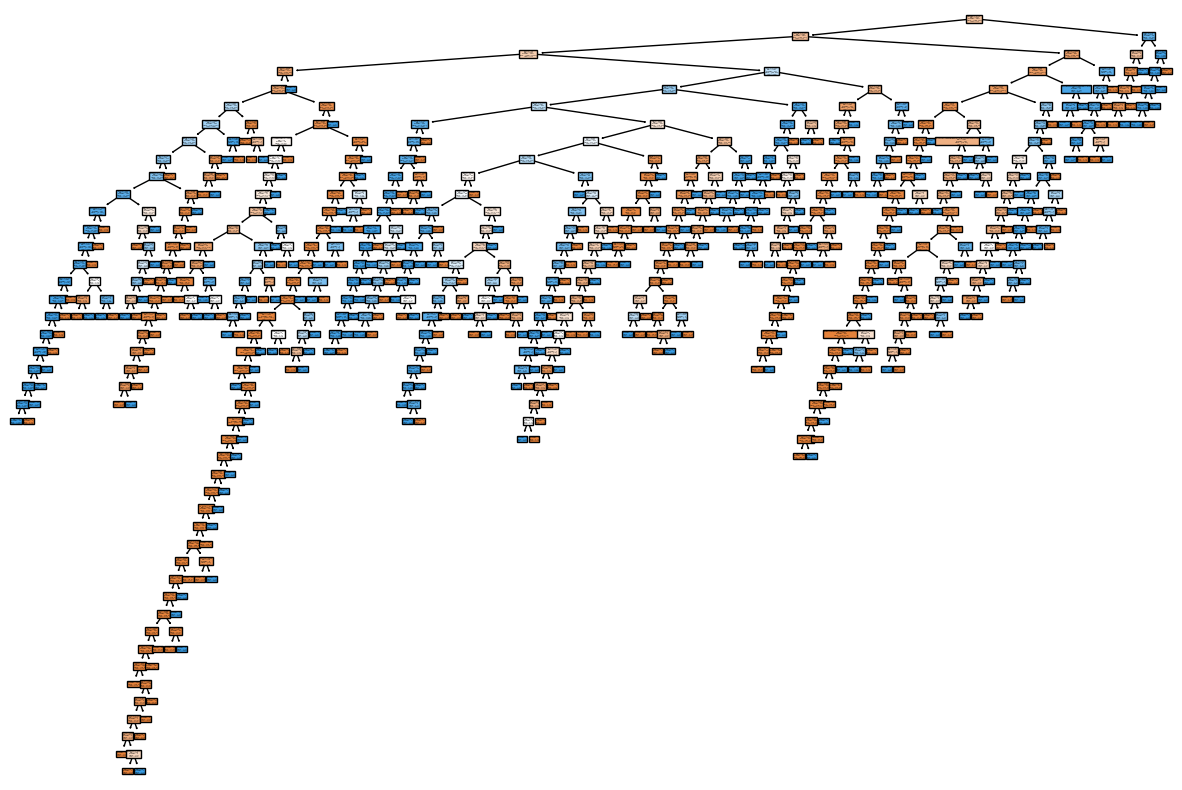

In [16]:
from sklearn.tree import plot_tree

estimator = clf_RF.estimators_[1]
estimator

plt.figure(figsize=(15, 10))
plot_tree(estimator, feature_names=vectorizer.get_feature_names_out(), class_names=['ham', 'spam'], filled=True)
plt.show()

Logistic Regression Accuracy: 0.9870689655172413


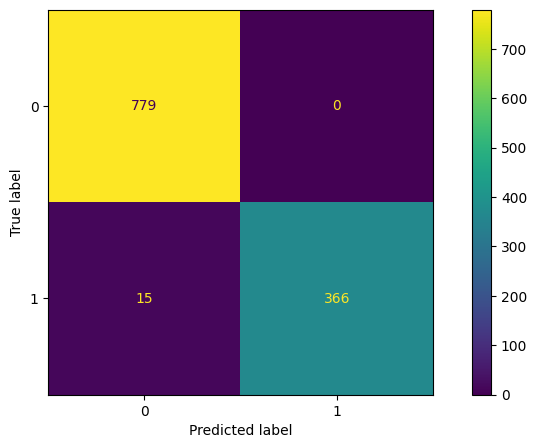

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_LR = LogisticRegression()
clf_LR.fit(X_train, y_train)

y_pred_LR = clf_LR.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Logistic Regression Accuracy:", accuracy_LR)

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR, ax=ax)
